## Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

## Acknowledgements
Anonymous but real source

## Inspiration
I look forward to come quality NLP! There is also some great opportunities for feature engineering, and multivariate analysis.

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from nltk.corpus import stopwords

In [2]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [7]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
#Fill all NaN values with 'No Title'
df['Title'] = df['Title'].fillna('No Title')

In [9]:
#Fill all NaN values with 'No Review'
df['Review Text'] = df['Review Text'].fillna('No Review')

In [10]:
df['Review Lenght'] = df['Review Text'].apply(len)

In [11]:
#Drop rest of the NaN Rows
df = df.dropna()

In [12]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Lenght
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [13]:
df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review Lenght              0
dtype: int64

In [14]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Lenght
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,918.486665,43.200707,4.195552,0.822256,2.537151,297.982788
std,202.727678,12.280913,1.110188,0.382305,5.703597,151.944293
min,0.000000,18.000000,1.000000,0.000000,0.000000,9.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,173.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,292.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,451.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000


In [15]:
#longest Review
df[df['Review Lenght'] == 508]['Review Text'].iloc[0]

'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

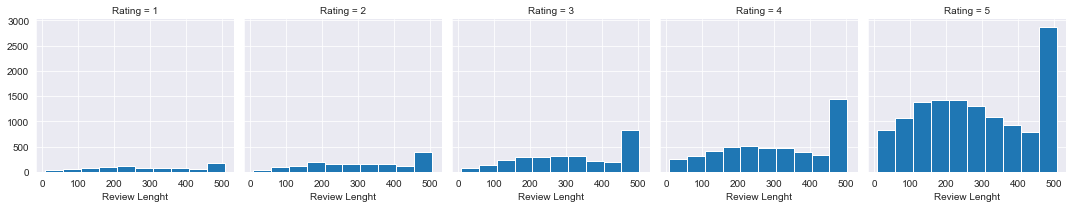

In [16]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Lenght')

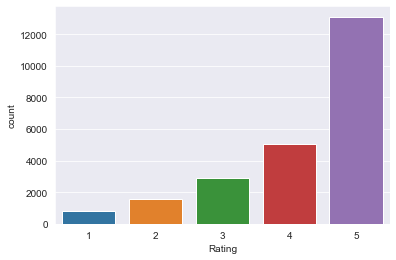

In [17]:
sns.countplot(data=df, x='Rating')

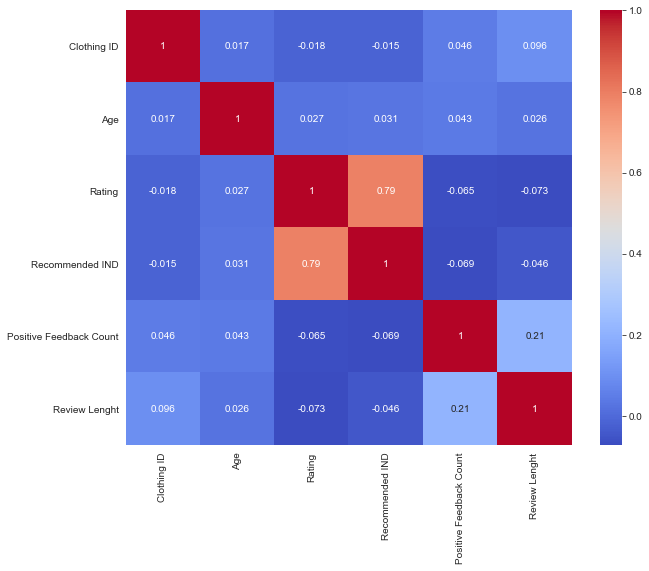

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [20]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Lenght
0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


In [21]:
#Create a function to pre-process for text.
def no_punc(text):
    #remove punctuation:
    no_punc = []
    for punc in text:
        if punc not in string.punctuation:
            no_punc.append(punc)
    no_punc = ''.join(no_punc)
    return no_punc

In [22]:
#remove stop words
def clean_mess(text):
    clean_mess = []
    for word in text:
        if word not in stopwords.words('english'):
            clean_mess.append(word)
    return clean_mess

In [23]:
df['Review Text'] = df['Review Text'].apply(no_punc)

In [24]:
df['Review Text'][0]

'Absolutely wonderful  silky and sexy and comfortable'

In [25]:
#Convert Upper case to lower case
df['Review Text']=df['Review Text'].str.lower()

In [26]:
df['Review Text'][0]

'absolutely wonderful  silky and sexy and comfortable'

In [27]:
df['Review Text'] = df['Review Text'].str.split()

In [28]:
print(df['Review Text'][0])

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']


In [29]:
df['Review Text']=df['Review Text'].apply(clean_mess)

In [30]:
print(df['Review Text'][0])

['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']


In [31]:
df['Review Text']=df['Review Text'].str.join(' ')

In [32]:
df['Review Text']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fits perfectly ...
Name: Review Text, Length: 23472, dtype: object

In [37]:
cv = CountVectorizer()

In [39]:
X = cv.fit_transform(df['Review Text'])
X

<23472x19200 sparse matrix of type '<class 'numpy.int64'>'
	with 610413 stored elements in Compressed Sparse Row format>

In [55]:
y = df['Recommended IND']
y

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: Recommended IND, Length: 23472, dtype: int64

In [56]:
review_train, review_test, recommend_train, recommend_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
model = RandomForestClassifier(n_estimators=12)

In [58]:
model.fit(review_train, recommend_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
predictions = model.predict(review_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
#RandomForest Model Evulation
print(confusion_matrix(recommend_test, predictions))
print('\n')
print(classification_report(recommend_test, predictions))

[[ 427  854]
 [ 199 5562]]


              precision    recall  f1-score   support

           0       0.68      0.33      0.45      1281
           1       0.87      0.97      0.91      5761

    accuracy                           0.85      7042
   macro avg       0.77      0.65      0.68      7042
weighted avg       0.83      0.85      0.83      7042

